In [94]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import linear_model
from sklearn import metrics  
import pickle

In [84]:
#loading in data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [85]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


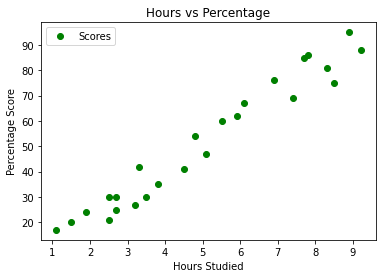

In [108]:
#plotting the data for easier visualisation
data.plot(x='Hours', y='Scores', style='o', color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [109]:
#creating the testing and trainin
X = data['Hours'].values  
y = data['Scores'].values  

In [110]:
#creating the testing and training sets for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [111]:
#fitting the model
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [112]:
#evaluating the model
acc = model.score(X_test.reshape(-1,1), y_test)
print(acc)

0.9454906892105354


In [113]:
#Creating prediction for the testing batch
y_pred = model.predict(X_test.reshape(-1,1)) # Predicting the scores

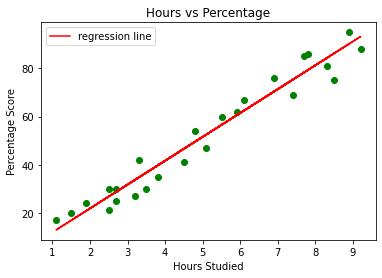

In [114]:
# Plotting for the test data
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.scatter(X, y, color='g')
plt.plot(X, line, label='regression line', color='r')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend(loc="upper left")
plt.show()

In [115]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hours': X_test, 'Actual': y_test, 'Predicted': y_pred})  
df 

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [118]:
#saving the model for later use
with open("marks.pkl", 'wb') as f:
    pickle.dump(model, f)
